# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 서포트 벡터 머신
> 로지스틱 회귀가 확률적인 거리를 최대로 하는 분리 직선을 찾는 반면, SVM은 분류 사이의 마진을 최대로 넓히면서도 오차를 최소화하는 직선을 찾으려고 한다.

### 선형 SVM 구현

In [3]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

# 데이터 분할
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# 일괄 작업 크기 선언
batch_size = 100

# 플레이스홀더 및 변수 선언
x_data = tf.placeholder(shape=[None,2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 모델 출력 값 선언
model_output = tf.subtract(tf.matmul(x_data, A), b)

# 비용 함수 선언
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.01])

classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 학습
prediction = tf.sign(model_output)
accuracy =  tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

loss_vec = []
train_acc = []
test_acc = []

for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    if (i+1) % 100 == 0:
        print('Step #{} A={}, b={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b))))
        print('Loss = {}\n'.format(str(temp_loss)))

Step #100 A=[[ 0.16355939]
 [-1.1785392 ]], b=[[0.25843883]]
Loss = [0.35358462]

Step #200 A=[[ 0.19314183]
 [-1.4308051 ]], b=[[0.1933387]]
Loss = [0.14454354]

Step #300 A=[[ 0.263083 ]
 [-1.6720024]], b=[[0.11993872]]
Loss = [0.16608778]

Step #400 A=[[ 0.26381195]
 [-1.8699377 ]], b=[[0.0687387]]
Loss = [0.1477067]

Step #500 A=[[ 0.28062963]
 [-1.9986448 ]], b=[[0.02493868]]
Loss = [0.14060214]



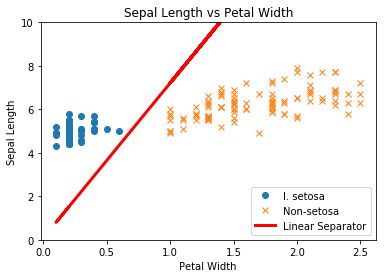

In [4]:
[[a1],[a2]] = sess.run(A)
[[b]] = sess.run(b)

slope = - a2 / a1
y_intercept = b / a1

x1_vals = [d[1] for d in x_vals]
best_fit = []

for i in x1_vals:
    best_fit.append(slope * i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
non_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
non_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

plt.plot(setosa_x , setosa_y, 'o', label='I. setosa')
plt.plot(non_setosa_x, non_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

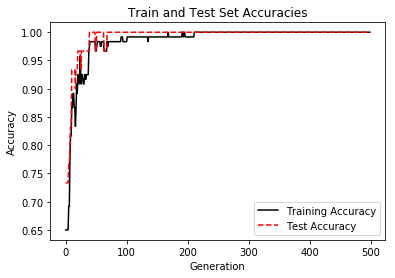

In [5]:
plt.plot(train_acc, 'k-', label='Training Accuracy')
plt.plot(test_acc, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

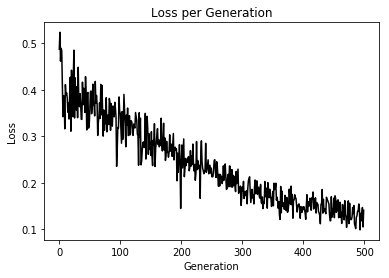

In [6]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

> SVM 회귀는 직관적으로 직선의 2e 폭이 마진 안에 가능한 한 많은 점을 포함시키는 함수를 찾는 과정이라고 할 수 있다. 
> 직선 최적화 과정은 e 매개변수에 상당히 민감하다. 
> e을 너무 작게 잡으면 알고리즘은 마진 안에 많은 점을 넣을 수 없다. 
> e이 너무 크면 마진 안에 모든 데이터를 넣을 수 있는 직선이 많아진다. 
> 마진에서 가까운 점이 비용 함수에 적은 영향을 미치기 때문에 작은 e 값을 더 선호한다.